**Gotham is a biologist. He is current working in collecting the details related to flowers and he is trying to categorize the flowers based on sepal length, sepal width, petal length and petal width.**


**Dataset URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data**


**As a data analyst, help Gotham to perform the below given task:**


**a) Open the dataset and display top 5 rows. (5 marks)**


In [33]:
import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [34]:
colnames = [
    "sepal length in cm",
    "sepal width in cm",
    "petal length in cm",
    "petal width in cm",
    "class",
]
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    names=colnames,
)

In [35]:
data.head(5)

sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm        class  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa

In [36]:
X = data.iloc[:, [0, 1, 2, 3]].values
y = data.iloc[:, 4].values

**b) Apply k-means to plot an elbow curve for K value from 1-10. (10 marks)**


In [37]:
def plot_kmeans_elbow(data, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.plot(range(1, max_clusters + 1), distortions, marker="o")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion")
    plt.title("K-means Elbow Plot")

    plt.show()


plot_kmeans_elbow(X, 10)

In [38]:
KElbowVisualizer(KMeans(), k=(1, 10)).fit(X).show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
# Perform K-means clustering with k = 3
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

**c) Display a scatter plot for the clustered values. (5 marks)**


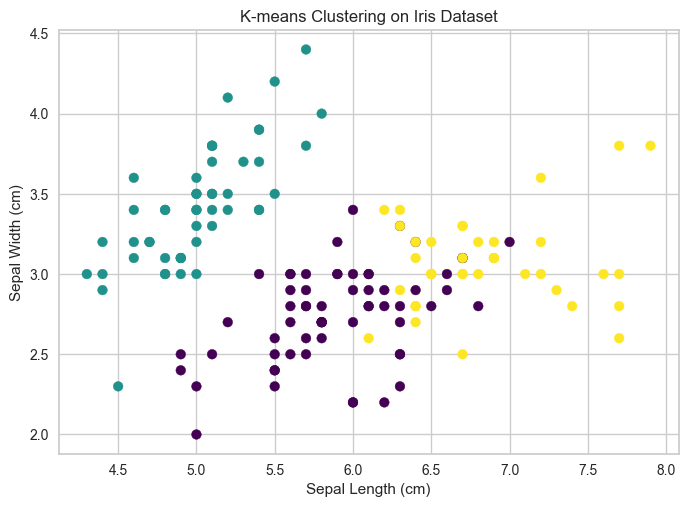

In [40]:
# Visualising the clusters
data["Cluster"] = kmeans.labels_
# Plotting the scatter plot
plt.scatter(
    data["sepal length in cm"],
    data["sepal width in cm"],
    c=data["Cluster"],
    cmap="viridis",
)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("K-means Clustering on Iris Dataset")
plt.show()

**d) Try to predict and display the labels for optimal cluster values. (10 marks)**


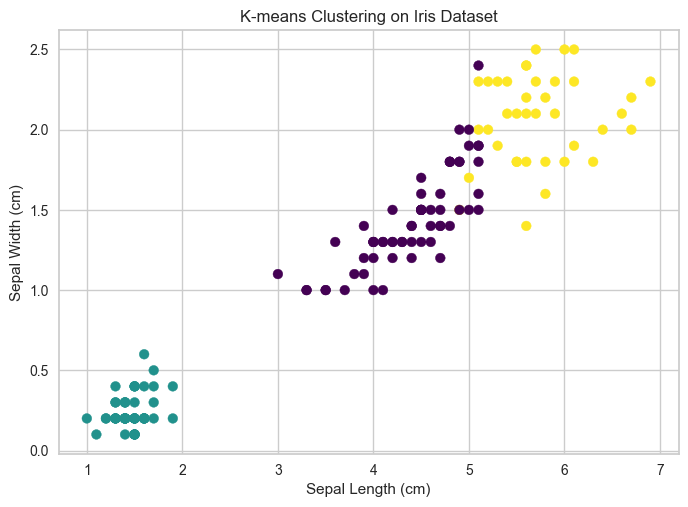

In [41]:
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
data["Cluster"] = y_kmeans
# Plotting the scatter plot
plt.scatter(
    data["petal length in cm"],
    data["petal width in cm"],
    c=data["Cluster"],
    cmap="viridis",
)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("K-means Clustering on Iris Dataset")
plt.show()

**e) Try to calculate Silhouette Score value for the K value from 2-10. (5 marks)**


In [42]:
def calculate_silhouette_scores(data, min_clusters, max_clusters):
    silhouette_scores = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

    return silhouette_scores


scores = calculate_silhouette_scores(X, 2, 10)

For n_clusters = 2 The average silhouette_score is : 0.6808136202936815
For n_clusters = 3 The average silhouette_score is : 0.5525919445499754
For n_clusters = 4 The average silhouette_score is : 0.4978256901095468
For n_clusters = 5 The average silhouette_score is : 0.49285559183161165
For n_clusters = 6 The average silhouette_score is : 0.36820569682713017
For n_clusters = 7 The average silhouette_score is : 0.3600597997328452
For n_clusters = 8 The average silhouette_score is : 0.35388153803536154
For n_clusters = 9 The average silhouette_score is : 0.3360761499577079
For n_clusters = 10 The average silhouette_score is : 0.33380799465468936


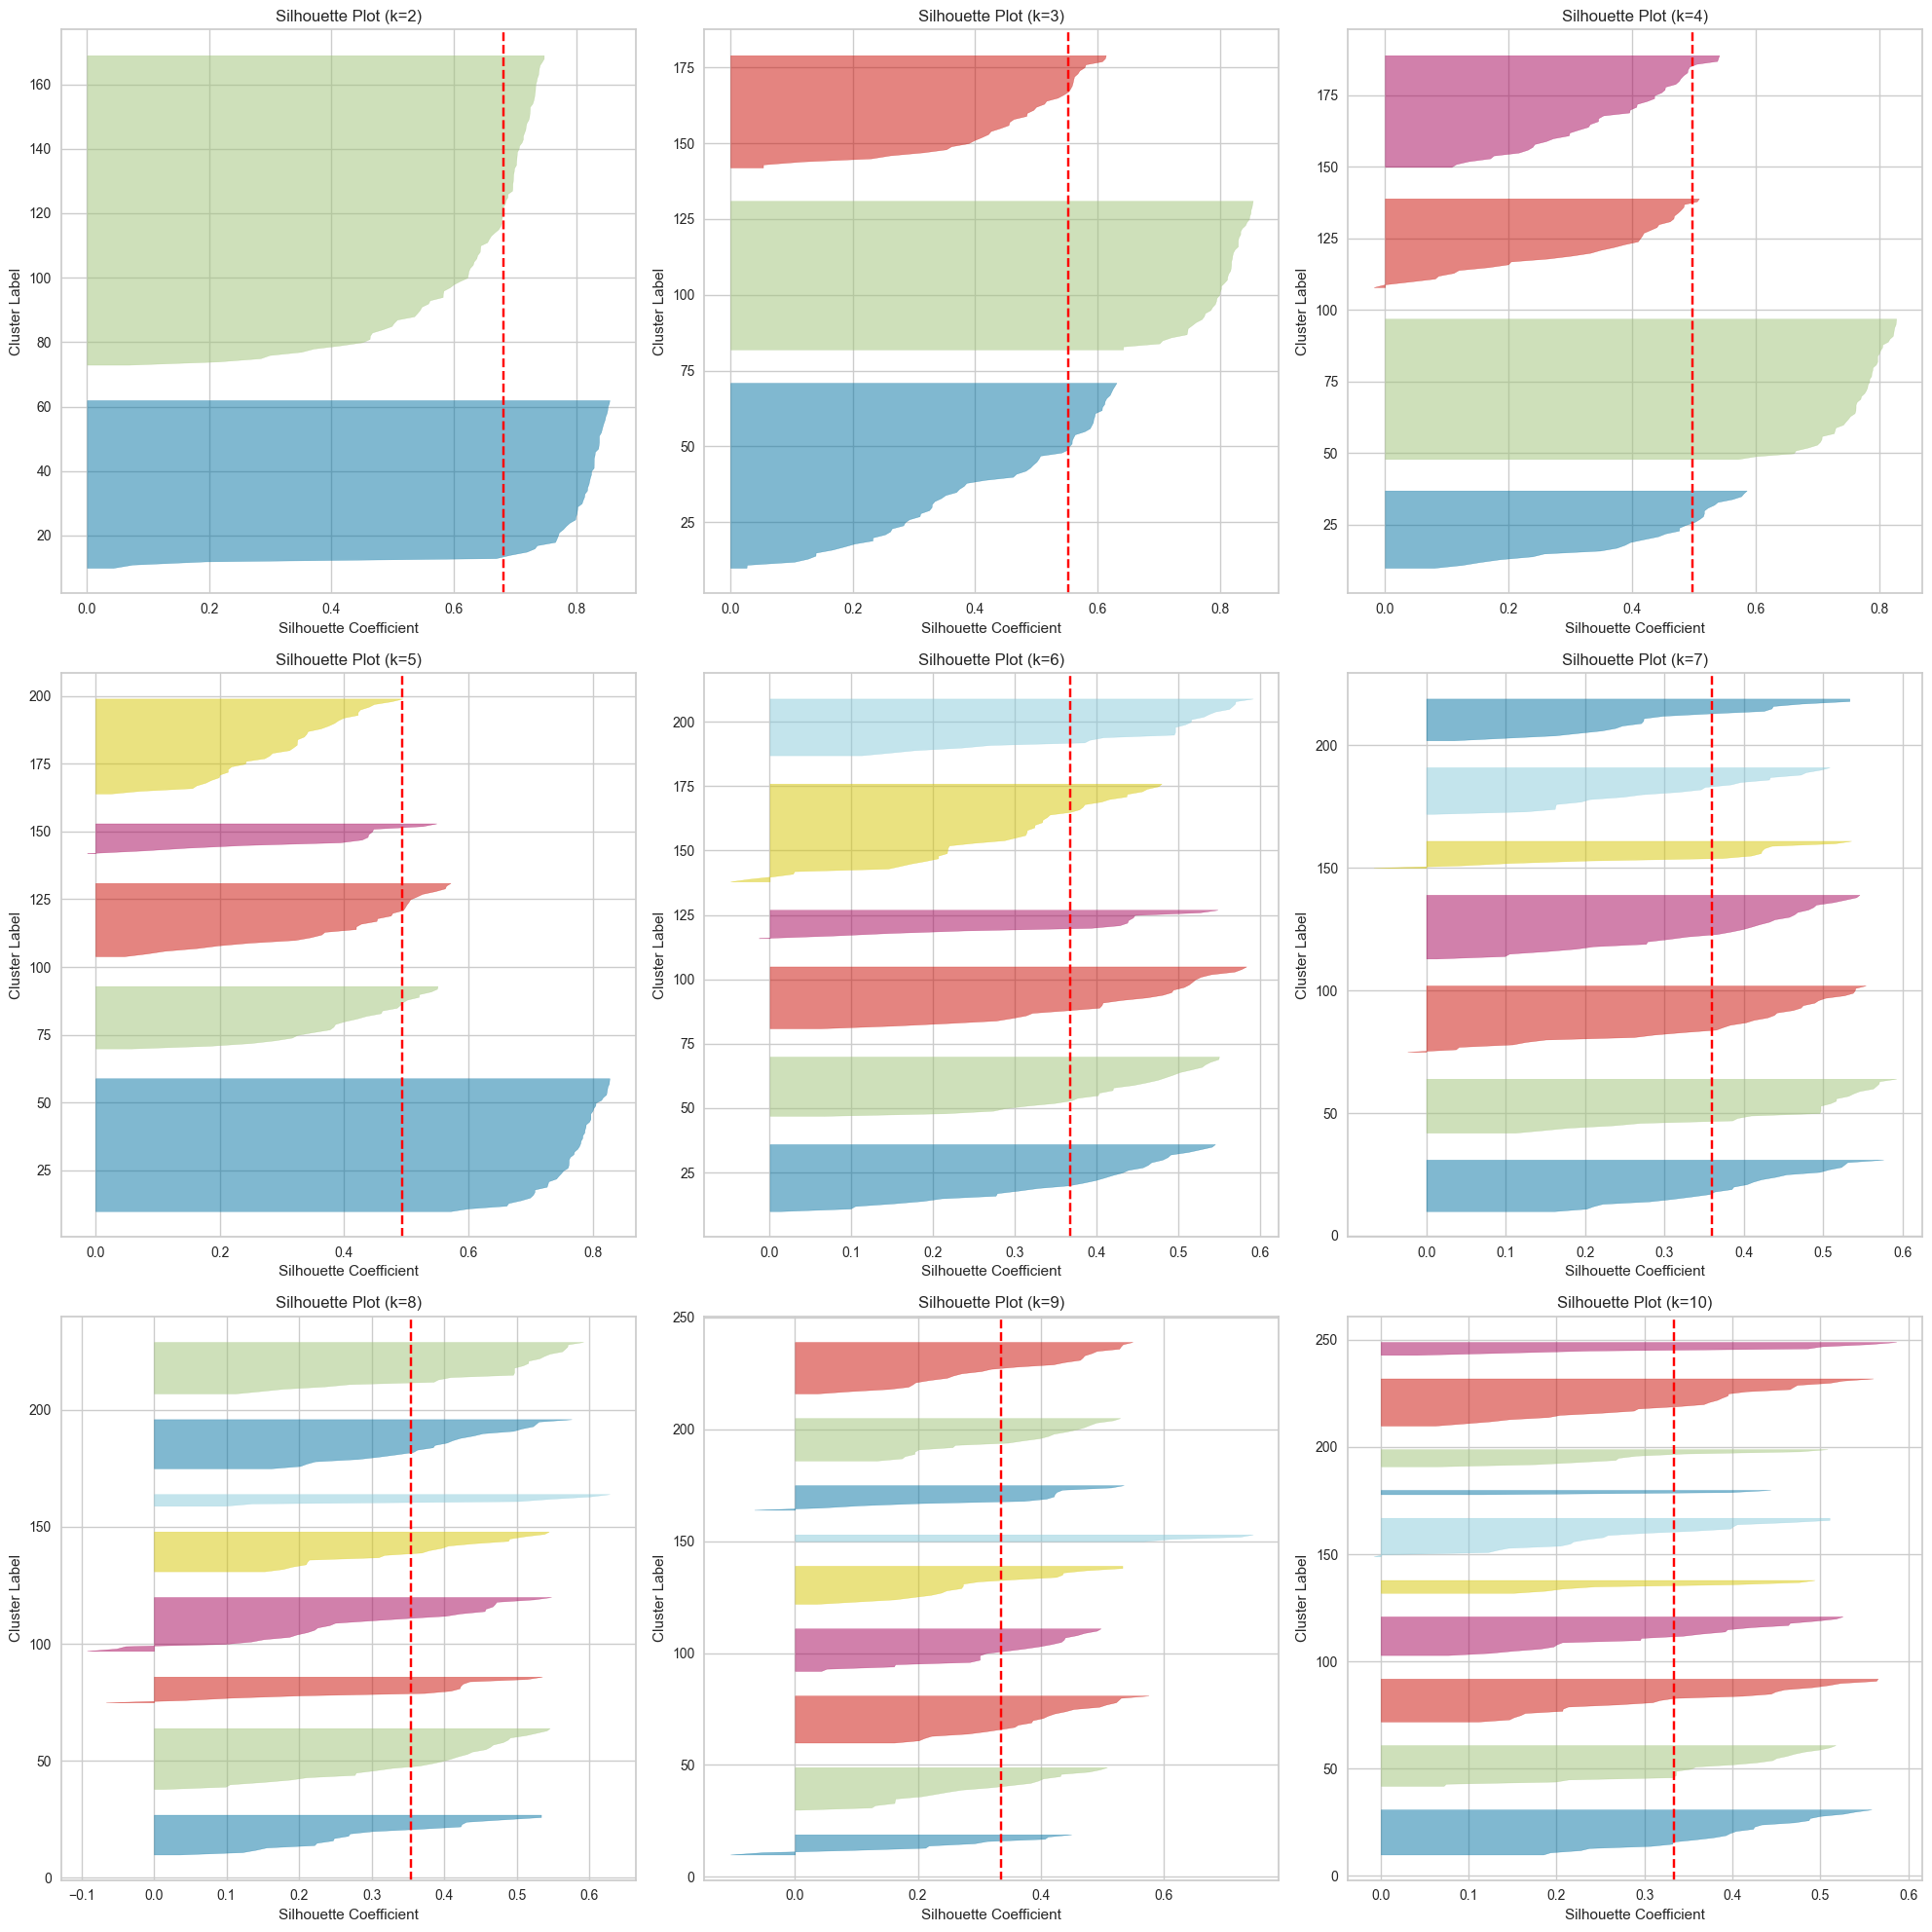

Optimal k value: 2


In [43]:
def plot_kmeans_silhouette(data, min_clusters, max_clusters):
    num_plots = max_clusters - min_clusters + 1
    num_rows = int(np.sqrt(num_plots))
    num_cols = int(np.ceil(num_plots / num_rows))

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    axs = axs.flatten()  # Flatten the axes array to simplify indexing

    avg_silhouette_scores = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        index = n_clusters - min_clusters

        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        visualizer = SilhouetteVisualizer(kmeans, colors="yellowbrick", ax=axs[index])
        visualizer.fit(data)

        axs[index].set_title(f"Silhouette Plot (k={n_clusters})")
        axs[index].set_xlabel("Silhouette Coefficient")
        axs[index].set_ylabel("Cluster Label")

        # Compute average silhouette score
        silhouette_avg = silhouette_score(data, kmeans.labels_)
        avg_silhouette_scores.append(silhouette_avg)

    # Hide extra subplots
    for i in range(num_plots, len(axs)):
        axs[i].axis("off")

    plt.tight_layout()
    plt.show()

    # Find the optimal k value
    optimal_k = min_clusters + np.argmax(avg_silhouette_scores)
    print(f"Optimal k value: {optimal_k}")


plot_kmeans_silhouette(X, 2, 10)